# Non-paramtric Kruskal-Wallis

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal


def import_csv(file):
    return pd.read_csv(file)

path = "../data/Terminos_lagoon_TA_DIC_2023_RawData.csv"

data = import_csv(path)




In [13]:

# ----- Kruskal-Wallis para dic_micromol_kg -----
grupos_dic = [group['dic_micromol_kg'].values 
              for name, group in data.groupby('area')]

stat_dic, p_dic = kruskal(*grupos_dic)
print("Análisis :")
print(f"Kruskal-Wallis DIC (μmol/kg) por área: Estadístico={stat_dic:.4f}, p-valor={p_dic:.4f}")

if p_dic < 0.05:
    print("Hay diferencias significativas en DIC (μmol/kg) entre áreas.")
else:
    print("No hay diferencias significativas en DIC (μmol/kg) entre áreas.")



Análisis :
Kruskal-Wallis DIC (μmol/kg) por área: Estadístico=55.8897, p-valor=0.0000
Hay diferencias significativas en DIC (μmol/kg) entre áreas.


In [14]:
# ----- Kruskal-Wallis para temp_c -----
grupos_temp = [group['temp_c'].values 
               for name, group in data.groupby('area')]

stat_temp, p_temp = kruskal(*grupos_temp)
print("Análisis :")
print(f"Kruskal-Wallis Temperatura (°C) por área: Estadístico={stat_temp:.4f}, p-valor={p_temp:.4f}")

if p_temp < 0.05:
    print("Hay diferencias significativas en Temperatura (°C) entre áreas.")
else:
    print("No hay diferencias significativas en Temperatura (°C) entre áreas.")

Análisis :
Kruskal-Wallis Temperatura (°C) por área: Estadístico=7.6996, p-valor=0.0213
Hay diferencias significativas en Temperatura (°C) entre áreas.


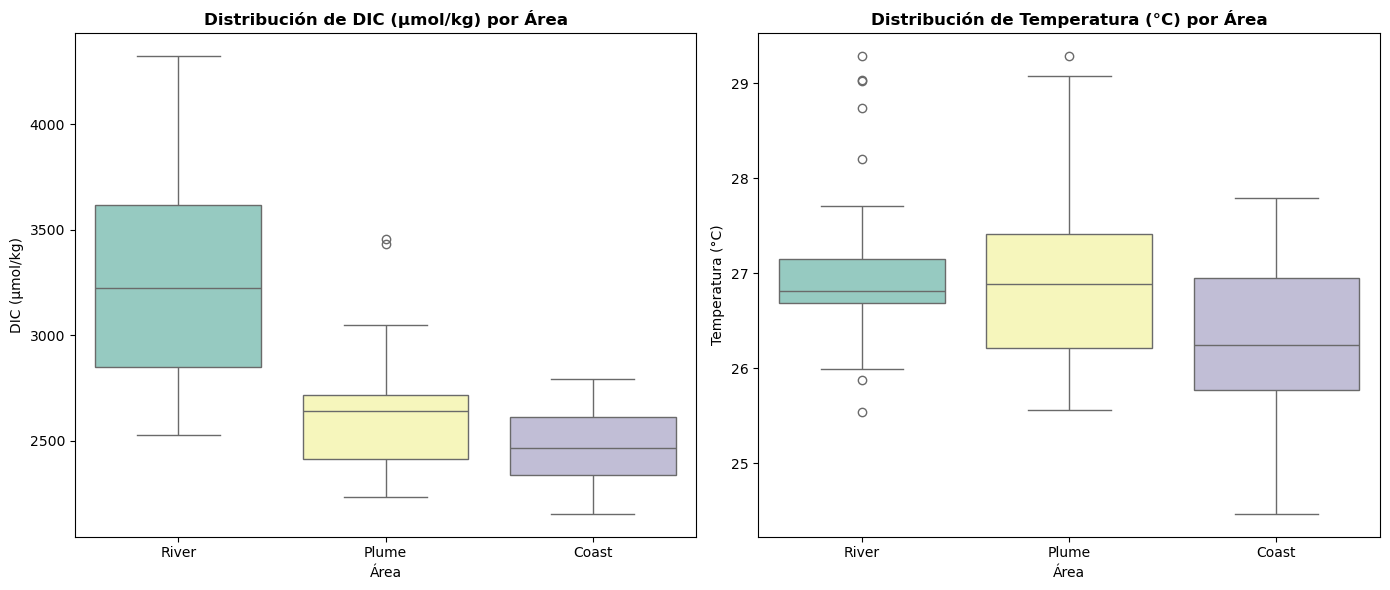

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
variables_plot = ['dic_micromol_kg', 'temp_c']
titles = ['DIC (μmol/kg)', 'Temperatura (°C)']

for i, var in enumerate(variables_plot):
    sns.boxplot(data=data, x='area', y=var, ax=axes[i], hue='area', palette="Set3", legend=False)
    axes[i].set_title(f'Distribución de {titles[i]} por Área', fontsize=12, fontweight='bold')
    axes[i].set_ylabel(titles[i])
    axes[i].set_xlabel('Área')

plt.tight_layout()
plt.show()